# Post-MVP Modeling

The purpose of this notebook is to improve the final model aka "Minimum Viable Product" that predicted with an F1 of 0.3955.

In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import pickle

# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn import metrics, utils, model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

In [2]:
# custom fuctions

import sys
sys.path.insert(0, '../src')
module_path = sys.path.insert(0, '../src')

if module_path not in sys.path:
     sys.path.append(module_path)
import helper_functions as helpers

In [3]:
import helper_functions as helpers

## Alternative Feature Engineering Method: Count Vectorization

### Importing X and y from `nlp_preprocesing.ipynb`

In [4]:
X_lem = pickle.load(open(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\pickle\X_lem.pkl', 'rb'))
y_lem = pd.read_pickle(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\pickle\y_lem.pkl')

In [5]:
# setting up stop words
stop_words = set(stopwords.words('english'))

### TTS & CountVectorize

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=20)

In [7]:
# using count vectorizor
count = CountVectorizer(stop_words=stop_words)

In [8]:
# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

In [9]:
## pickling X_train for future use
pickle_out = open(r"C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\pickle\X_train_2.pkl","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

In [26]:
## pickling X_train for future use
pickle_out = open(r"C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\pickle\X_train.pkl","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

### Linear SVM Model (MVP)

In [10]:
SVM_baseline = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [11]:
%%time 
# Wall time: 25min 6s

# fit the training dataset on the classifier
SVM_baseline.fit(X_train_count, y_train)
# predict the labels on validation dataset
SVM_test_preds = SVM_baseline.predict(X_test_count)

Wall time: 21min 30s


In [12]:
def extract_attributes(self):
        self.context['$'] = self.cleaned_data
        for name, template in six.iteritems(self.templates):
            self.context[name] = template
        if semantic_version.Version.coerce(self.spec_version) \
                >= semantic_version.Version.coerce('2.2'):
            management_form = catalog_forms.WF_MANAGEMENT_NAME
            name = self.context['$'][management_form]['application_name']
            self.application['?']['name'] = name
        attributes = print(self.application, self.context,SVM_precision, SVM_recall, SVM_f1_score, SVM_f1_weighte)
        return attributes

In [21]:
SVM_precision = precision_score(y_test, SVM_test_preds)
SVM_recall = recall_score(y_test, SVM_test_preds)
SVM_f1_score = f1_score(y_test, SVM_test_preds)
SVM_f1_weighted = f1_score(y_test, SVM_test_preds, average='weighted')

# printing scores
print({SVM_precision, SVM_recall, SVM_f1_score, SVM_f1_weighted})

{0.22385479688850476, 0.8863651137129606, 0.3918305597579425, 0.28492849284928495}


This improved the original F1 of .232, but this F1 score is still pretty low compared to the TFIDF Linear SVM model.

### Logisitic Regression

In [22]:
logreg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [23]:
%%time
# Wall time: 14.1 s

logreg_baseline.fit(X_train_count, y_train)
logreg_test_preds = logreg_baseline.predict(X_test_count)

Wall time: 8.33 s


In [24]:
logreg_precision = precision_score(y_test, logreg_test_preds)
logreg_recall = recall_score(y_test, logreg_test_preds)
logreg_f1_score = f1_score(y_test, logreg_test_preds)
logreg_f1_weighted = f1_score(y_test, logreg_test_preds, average='weighted')

# printing scores
print(logreg_precision, logreg_recall, logreg_f1_score, logreg_f1_weighted)

0.22857142857142856 0.48411497730711045 0.3105288694808345 0.8808773481018308


## Overfit or Underfit?

In [25]:
LogisticRegression(solver='liblinear')

LogisticRegression(solver='liblinear')

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [27]:
%%time
# training f1
baseline_f1_cv = cross_val_score(logreg_baseline, X_train_count, y_train, scoring='f1', cv=5)
baseline_mean_cv = round(baseline_f1_cv.mean(), 6)

Wall time: 36.5 s


In [28]:
%%time
# training f1
baseline_f1_cv = cross_val_score(logreg_baseline, X_train_count, y_train, scoring='f1', cv=5)
baseline_mean_cv = round(baseline_f1_cv.mean(), 6)

Wall time: 37.8 s


In [29]:
from sklearn import linear_model

In [30]:
baseline_fit =print(baseline_mean_cv, logreg_f1_score)
baseline_fit

0.308309 0.3105288694808345


In [31]:
# cross validated f1 score for training set
print('Training F1 Score: {:.5}'.format(baseline_mean_cv))
# uniform f1 score for testing set
print('Testing F1 Score: {:.5}'.format(logreg_f1_score))

Training F1 Score: 0.30831
Testing F1 Score: 0.31053


Good news, this model is only slightly overfit. Nothing to be to concerned about.

**Note:** for some reason, this model becomes underfit in `final_notebook.ipynb`. This could possibly be attributed to the train-test split's random state. However, although the training F1s are different, the testing F1s are exactly the same. So we can disregard this.

So this beat the TFIDF Log Reg score of .3878, and was slightly better than .3955 from the TFIDF Linear SVM. Let's try Naive Bayes next before trying out grid search on this model.

In [32]:
target_names = ['class 0', 'class 1']
print('-'*7 + ' Log Reg Baseline with Count Vectorizor ' + '-'*6)
print(classification_report(y_test, logreg_test_preds, target_names=target_names))

------- Log Reg Baseline with Count Vectorizor ------
              precision    recall  f1-score   support

     class 0       0.96      0.88      0.92      9374
     class 1       0.23      0.48      0.31       661

    accuracy                           0.86     10035
   macro avg       0.59      0.68      0.62     10035
weighted avg       0.91      0.86      0.88     10035



If we compare the classification report for both models, it's worth noting that this model predicts the "Not Hate Speech" label slightly worse than the original.

There's no change in the prediction of the "Hate Speech" label, but that's what needs to be changed. If there's no increase after grid search, then it wont be worth implimenting into the final_notebook.

### Naive Bayes

In [33]:
baseline_bayes = MultinomialNB(alpha = .01)

In [34]:
%%time
baseline_bayes.fit(X_train_count, y_train)
bayes_test_preds = baseline_bayes.predict(X_test_count)

Wall time: 247 ms


In [35]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

# printing scores
print(bayes_precision, bayes_recall, bayes_f1_score, bayes_f1_weighted)

0.2626641651031895 0.2118003025718608 0.23450586264656614 0.9043455243501541


There was a big increase from the original Bayes model that had an F1 of .1923. However, .3128 still isn't good enough.

## Improving Logistic Regression Model

c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


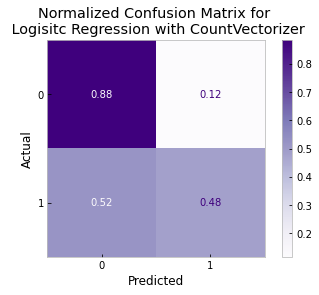

In [36]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(logreg_baseline, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Logisitc Regression with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\normalized_count_log_reg_matrix.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

Interestingly, this confusion matrix shows a much better score for the TPR! It bumped up from 0.44 to 0.62.

Before performing grid search, let's try Smote and Tomek Links to improve this model.

## Smote

In [37]:
sm = SMOTE(random_state=45)
smote_X_train, smote_y_train = sm.fit_resample(X_train_count, y_train)

In [38]:
smote_logreg = LogisticRegression(penalty='l2', random_state=55)

In [39]:
%%time
smote_logreg.fit(smote_X_train, smote_y_train)
smote_logreg_test_preds = smote_logreg.predict(X_test_count)

Wall time: 14.2 s


In [40]:
smote_precision = precision_score(y_test, smote_logreg_test_preds)
smote_recall = recall_score(y_test, smote_logreg_test_preds)
smote_f1_score = f1_score(y_test, smote_logreg_test_preds)
smote_weighted_f1_score = f1_score(y_test, smote_logreg_test_preds, average='weighted')

print(smote_precision, smote_recall, smote_f1_score, smote_weighted_f1_score)

0.17213712618526622 0.35703479576399394 0.23228346456692914 0.8686434995946404


c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


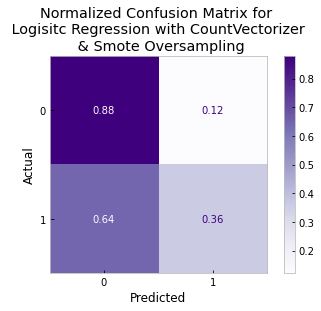

In [44]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(smote_logreg, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Logisitc Regression with CountVectorizer \n & Smote Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\normalized_count_log_reg_matrix1.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

This model performed worse than the inital logistic regression model, so next let's try tomek links to see if anything changes.

## Tomek Links

In [45]:
tl = TomekLinks()
tomek_X_train, tomek_y_train = tl.fit_resample(X_train_count, y_train)
print('Resampled dataset shape %s' % Counter(tomek_y_train))

Resampled dataset shape Counter({0: 37460, 1: 2581})


In [46]:
tomek_logreg = LogisticRegression(penalty='l2', random_state=55)

In [47]:
%%time
tomek_logreg.fit(tomek_X_train, tomek_y_train)
tomek_logreg_test_preds = tomek_logreg.predict(X_test_count)

Wall time: 6.61 s


In [48]:
tomek_precision = precision_score(y_test, tomek_logreg_test_preds)
tomek_recall = recall_score(y_test, tomek_logreg_test_preds)
tomek_f1_score = f1_score(y_test, tomek_logreg_test_preds)
tomek_weighted_f1_score = f1_score(y_test, tomek_logreg_test_preds, average='weighted')

print(tomek_precision, tomek_recall, tomek_f1_score, tomek_weighted_f1_score)

0.40331491712707185 0.11043872919818457 0.17339667458432304 0.9117391662058694


c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


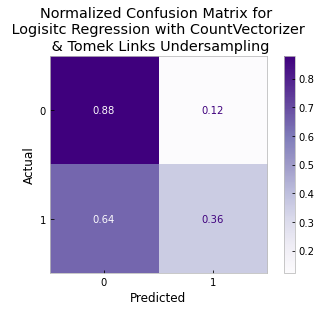

In [51]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(smote_logreg, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Logisitc Regression with CountVectorizer \n & Tomek Links Undersampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
#plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\normalized_count_log_reg_matrix.pngg', bbox_inches = "tight", pad_inches=.5)
plt.show()

Overall, the Logisitic Regression basline is the best! Next let's try grid search to see if any improvement can be made.

It's worth noting that this Tomek Link Log Reg model has a better TPR than the MVP model. But it's still not better than the original Logisitic Regression model at the beginning of this notebook.

## Grid Search without resampling methods

In [52]:
# creating the model
baseline_log_reg = LogisticRegression(class_weight='balanced', random_state=50)

In [53]:
# creating param_dict
param_dict={'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'newton-cg', 'sag'], 'C':
[100, 10, 1.0, 0.1, 0.01]}

In [54]:
# instantiate Grid Search CV with F1 metric
grid_log_reg = GridSearchCV(baseline_log_reg, param_dict, cv=5, scoring='f1', verbose=1)

In [55]:
%%time
# fit the grid search to our data
grid_log_reg.fit(X_train_count, y_train)

# Wall time: 6min 8seconds to run

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

Wall time: 24min 26s


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=50),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'sag']},
             scoring='f1', verbose=1)

In [56]:
# generate score with .best_score_ and hyperparemeters with .best_params_
print('F1 Score:', grid_log_reg.best_score_)
print('Best Hyperparameters:', grid_log_reg.best_params_)
print('Model object with best parameters: ')
print(grid_log_reg.best_estimator_)

F1 Score: 0.318831272986134
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Model object with best parameters: 
LogisticRegression(C=0.1, class_weight='balanced', random_state=50,
                   solver='liblinear')


In [57]:
# Predict the response for test dataset
grid_base_y_pred_train = grid_log_reg.best_estimator_.predict(X_train_count)

# predict the training set
grid_base_y_pred_test = grid_log_reg.best_estimator_.predict(X_test_count)

In [58]:
tuned_base_precision = precision_score(y_test, grid_base_y_pred_test)
tuned_base_recall = recall_score(y_test, grid_base_y_pred_test)
tuned_base_f1_score = f1_score(y_test, grid_base_y_pred_test)
tuned_weighted_f1_score = f1_score(y_test, tomek_logreg_test_preds, average='weighted')

print({tuned_base_precision}, {tuned_base_recall}, {tuned_base_f1_score}, {tuned_weighted_f1_score})

{0.20763956904995104} {0.6414523449319214} {0.3137254901960785} {0.9117391662058694}


c:\Users\Ricky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


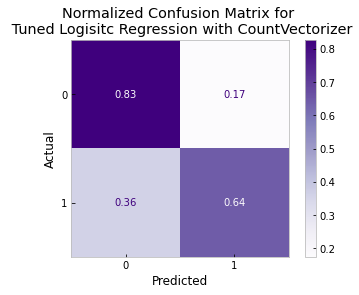

In [59]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(grid_log_reg, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Tuned Logisitc Regression with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\normalized_count_log_reg_matrix1.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

### Overfit or Underfit?

In [60]:
%%time
# training f1
tuned_f1_cv = cross_val_score(logreg_baseline, X_train_count, y_train, scoring='f1', cv=5)
tuned_mean_cv = round(tuned_f1_cv.mean(), 6)

Wall time: 39.8 s


In [61]:
tuned_fit = print(tuned_mean_cv, tuned_base_f1_score)
tuned_fit

0.308309 0.3137254901960785


In [62]:
# cross validated f1 score for training set
print('Training F1 Score: {:.5}'.format(tuned_mean_cv))
# uniform f1 score for testing set
print('Testing F1 Score: {:.5}'.format(tuned_base_f1_score))

Training F1 Score: 0.30831
Testing F1 Score: 0.31373


All of these evaluation metric methods reiterate that the tuned model is exactly the same as the baseline model. This outcome isn't surpising because there aren't many hyperparameters to tune with Logistic Regression.

Therefore, we can safely go with the basline Logistic Regression model with Count Vectorization as the new MVP. Although having a Recall (TPR) .62 isn't signifigantly better, at least it's better than just the random guessing is was before.